# Submission By : LOHITHA MATTA

# EMAIL SPAM DETECTION WITH MACHINE LEARNING

## Data Science Internship

# TASK-3

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Preparation

In [5]:
data=pd.read_csv("C:/Users/L/OneDrive/Desktop/spam.csv",encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Exploration

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
data.shape

(5572, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
data['v2'].value_counts()

v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                   

In [14]:
data['Unnamed: 2'].value_counts()

Unnamed: 2
 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                          

In [15]:
data['Unnamed: 3'].value_counts()

Unnamed: 3
 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: count, dtype: int64

In [16]:
data['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [17]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [21]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [22]:
#Replacing v1,v2 with Class(spam/ham), Mail
data.rename(columns={'v1':'Class','v2':'Mail'},inplace=True)
data.columns

Index(['Class', 'Mail'], dtype='object')

## Label Encoding

In [23]:
# spam=0
# ham=1
data.loc[data['Class']=='spam','Class',]=0
data.loc[data['Class']=='ham','Class',]=1

## Data Visualization

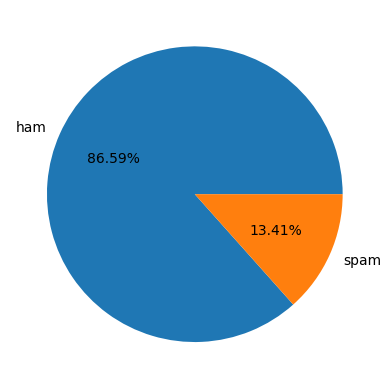

In [26]:
l=['ham','spam']
s=data['Class'].value_counts()
plt.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

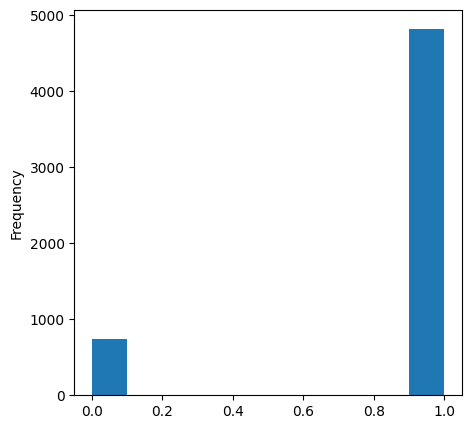

In [28]:
data['Class'].plot(bins=10,kind='hist',figsize=(5,5))
plt.show()

## Feature Extraction

In [31]:
f=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
xtrain_f=f.fit_transform(X_train)
xtest_f=f.fit_transform(X_test)

In [32]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

## Train - Test - Split

In [30]:
X=data['Mail']
Y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Model Building and Evaluation

In [38]:
model=LogisticRegression()
model.fit(xtrain_f,y_train)
pred_train=model.predict(xtrain_f)
accuracy=accuracy_score(y_train,pred_train)
print("accuracy is:",accuracy)
cnf=metrics.confusion_matrix(y_train,pred_train)
cnf

accuracy is: 0.9694862014808167


array([[ 463,  134],
       [   2, 3858]], dtype=int64)

# THANK YOU!